nameStrct[0] = nlnr0_IO_82
nameStrct[1] = nlnr1_IO_82
lattices[nlnr0_IO_82] = /home/vagrant/jupyter/eidelyur/iota/lattice_1IO_center.madx
lattices[nlnr1_IO_82] = /home/vagrant/jupyter/eidelyur/iota/lattice_1IO_center.madx
attrList (optsCrrnt = workflow.make_opts) = [('__doc__', 'Define a set of command-line options.\n    Hierarchical sets of option may be created with add_suboptions.\n    \n    :param name: The name for this set of options to appear in the :code:`--help` output\n\n    The value of each option is available as a data member. The following example\n    prints the (integer) value 4:\n    \n    .. code-block:: python\n\n        from synergia_workflow import Options\n        opts = Options("foo")\n        opts.add("bar", 4, "bar parameter")\n        print opts.bar\n    '), ('__init__', <bound method Options.__init__ of <synergia_workflow.options.Options instance at 0x7f83548426c8>>), ('__module__', 'synergia_workflow.options'), ('_get_desc_str', <bound method Options._get_de

/home/vagrant/.pyenv/versions/py2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


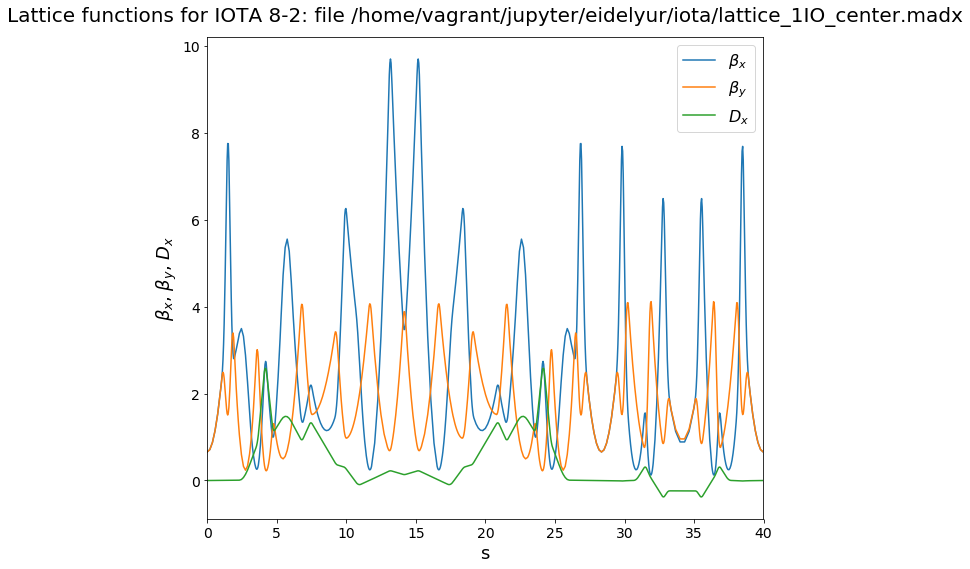

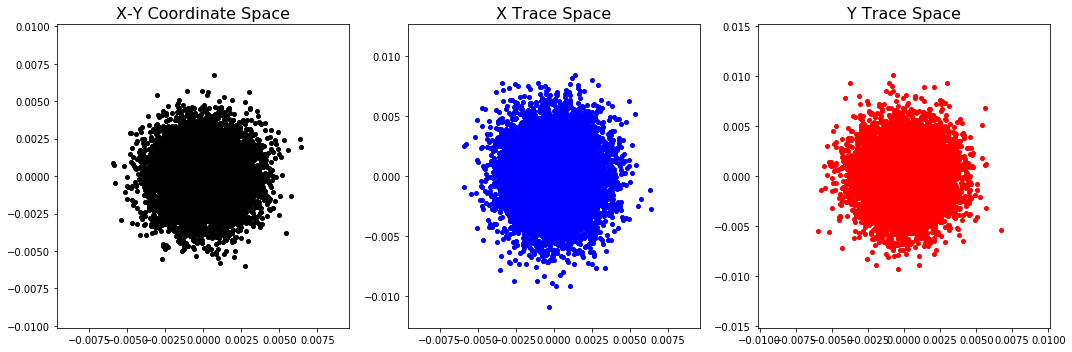

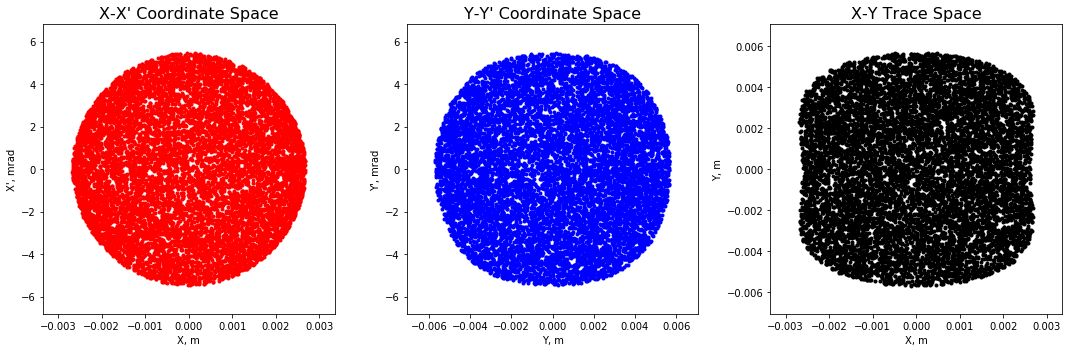

Number of particles in the bunch = 10000
Particle 0: x = -0.00171090887341, px = -0.00150039877014, y = -0.00403299805516, py = -0.00263988380755, s = 0.0556058784001, ps = 0.0, id = 0.0
Particle 1: x = 0.00229302301409, px = 0.000931406738347, y = -0.00425463224502, py = 0.000367426431525, s = 0.0740736816062, ps = 0.0, id = 1.0
Particle 2: x = -0.00187150961619, px = 0.00318914360887, y = -0.00244953334566, py = 0.00184411438347, s = -0.0488241124423, ps = 0.0, id = 2.0
Particle 3: x = 0.00049372370706, px = -0.0018949245216, y = 0.00497227058516, py = -0.0022340172009, s = 0.0176630141997, ps = 0.0, id = 3.0
Particle 4: x = 0.00178075738228, px = -0.00397312252493, y = 0.00170181277048, py = 5.55158041175e-05, s = 0.0433874232159, ps = 0.0, id = 4.0
Particle 5: x = 0.000122382680321, px = 0.00137849748603, y = 0.00462376531482, py = 0.00330366973175, s = -0.016626240118, ps = 0.0, id = 5.0
Particle 6: x = 0.0020210624315, px = 0.0029455383935, y = -0.000483571079108, py = -0.0018965

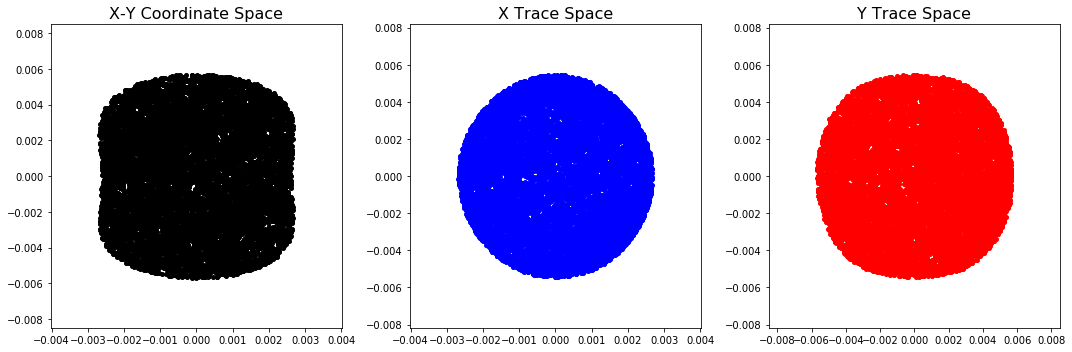

attrList (optsCrrnt = workflow.make_opts) = [('__doc__', 'Define a set of command-line options.\n    Hierarchical sets of option may be created with add_suboptions.\n    \n    :param name: The name for this set of options to appear in the :code:`--help` output\n\n    The value of each option is available as a data member. The following example\n    prints the (integer) value 4:\n    \n    .. code-block:: python\n\n        from synergia_workflow import Options\n        opts = Options("foo")\n        opts.add("bar", 4, "bar parameter")\n        print opts.bar\n    '), ('__init__', <bound method Options.__init__ of <synergia_workflow.options.Options instance at 0x7f833d066e60>>), ('__module__', 'synergia_workflow.options'), ('_get_desc_str', <bound method Options._get_desc_str of <synergia_workflow.options.Options instance at 0x7f833d066e60>>), ('_get_opt_default_str', <bound method Options._get_opt_default_str of <synergia_workflow.options.Options instance at 0x7f833d066e60>>), ('_get_op

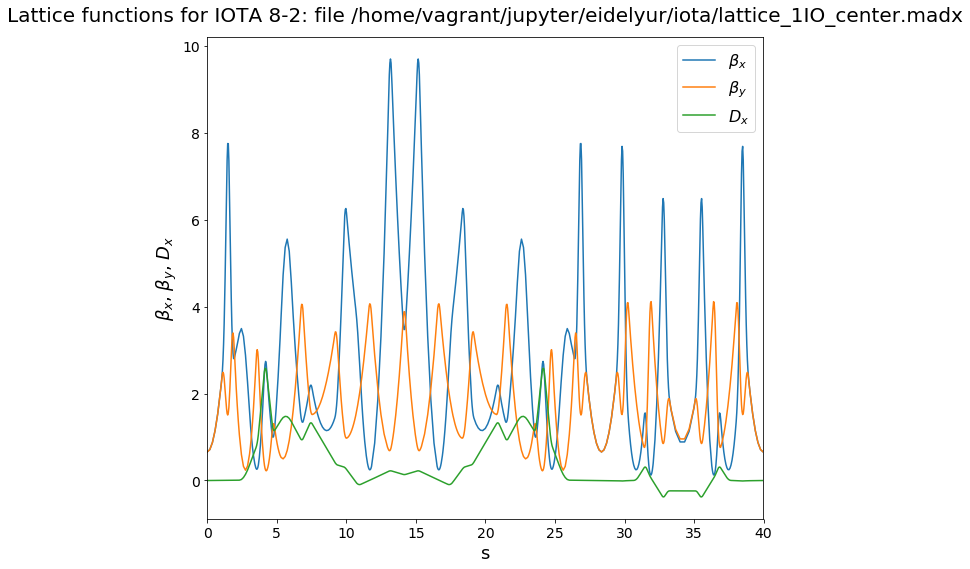

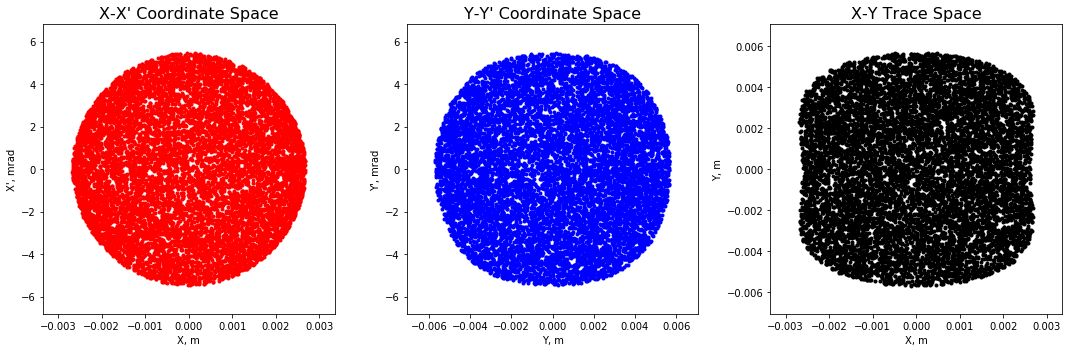

Number of particles in the bunch = 10000
Particle 0: x = -0.00171090887341, px = -0.00150039877014, y = -0.00403299805516, py = -0.00263988380755, s = 0.0556058784001, ps = 0.0, id = 0.0
Particle 1: x = 0.00229302301409, px = 0.000931406738347, y = -0.00425463224502, py = 0.000367426431525, s = 0.0740736816062, ps = 0.0, id = 1.0
Particle 2: x = -0.00187150961619, px = 0.00318914360887, y = -0.00244953334566, py = 0.00184411438347, s = -0.0488241124423, ps = 0.0, id = 2.0
Particle 3: x = 0.00049372370706, px = -0.0018949245216, y = 0.00497227058516, py = -0.0022340172009, s = 0.0176630141997, ps = 0.0, id = 3.0
Particle 4: x = 0.00178075738228, px = -0.00397312252493, y = 0.00170181277048, py = 5.55158041175e-05, s = 0.0433874232159, ps = 0.0, id = 4.0
Particle 5: x = 0.000122382680321, px = 0.00137849748603, y = 0.00462376531482, py = 0.00330366973175, s = -0.016626240118, ps = 0.0, id = 5.0
Particle 6: x = 0.0020210624315, px = 0.0029455383935, y = -0.000483571079108, py = -0.0018965

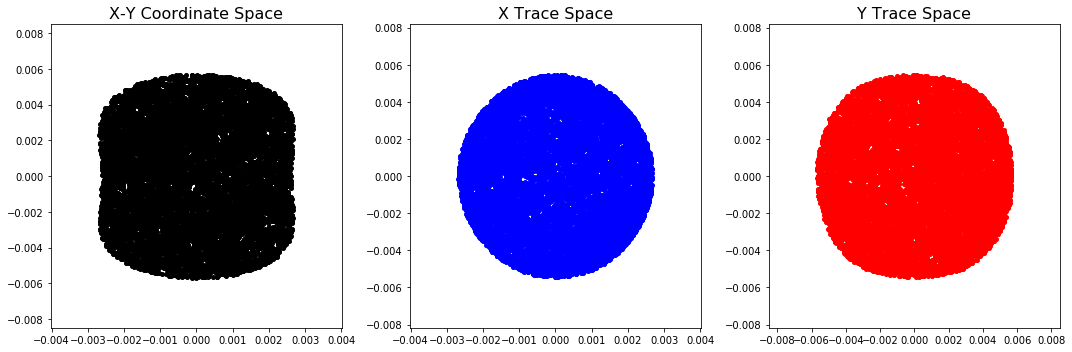

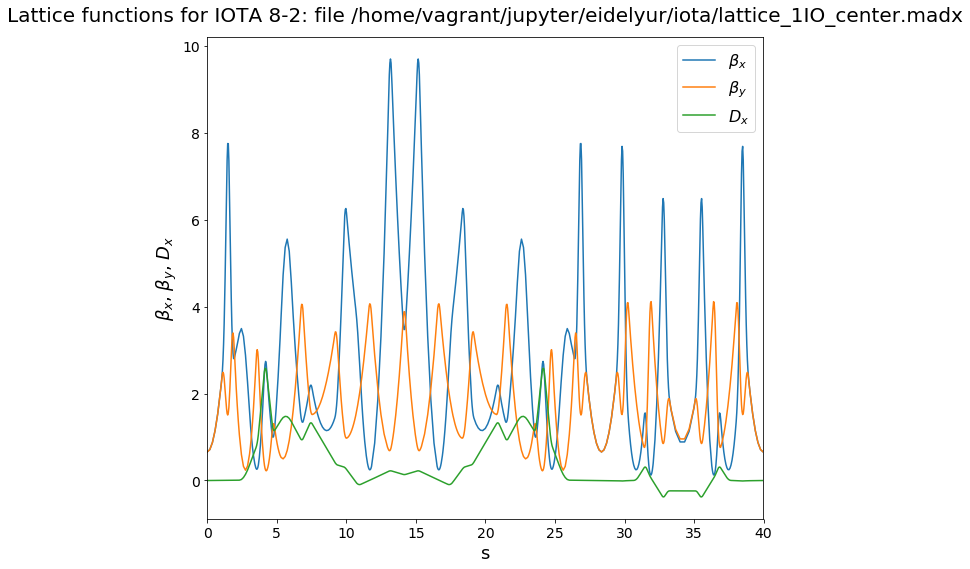

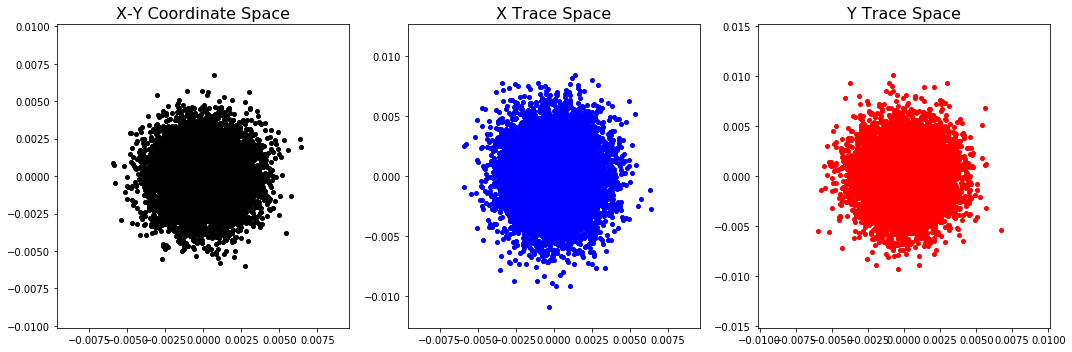

Before main simulation
Total minBeta = 0.160266386784 m (number = 147), MaxElem_length = 1.61 m (number = 156), maxSteps = 5 (number = 72)
'0' = 42, '1' = 122, '2' = 14, '3' = 1, '4' = 0, '5' = 1
Before 'get_linear_one_turn_map'...
One Turn Map:
[[-3.09343e-01  6.21675e-01  0.00000e+00  0.00000e+00  0.00000e+00  1.39697e-04]
 [-1.45457e+00 -3.09464e-01  0.00000e+00  0.00000e+00  0.00000e+00  6.03764e-05]
 [ 0.00000e+00  0.00000e+00 -3.09271e-01  6.21835e-01  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00 -1.45431e+00 -3.09312e-01  0.00000e+00  0.00000e+00]
 [ 2.53275e-03  1.10859e-03  0.00000e+00  0.00000e+00  1.00000e+00 -5.01545e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00]]
after 'get_linear_one_turn_map'...
Input of nTurnsMap:
[[-3.09343e-01  6.21675e-01  0.00000e+00  0.00000e+00  0.00000e+00  1.39697e-04]
 [-1.45457e+00 -3.09464e-01  0.00000e+00  0.00000e+00  0.00000e+00  6.03764e-05]
 [ 0.00000e+00  0.00000e+00 -3.09271e-01  6.21835e


Your selection: next, break next


You selectiion is  next
attrList (bunchDiag = synergia.bunch.Diagnostics_basic) = [('__class__', <type 'Boost.Python.class'>), ('__delattr__', <slot wrapper '__delattr__' of 'object' objects>), ('__dict__', dict_proxy({'get_s_n': <Boost.Python.function object at 0x382dba0>, '__module__': 'synergia.bunch.bunch', 'get_max': <Boost.Python.function object at 0x382de40>, '__instance_size__': 32, '__reduce__': <Boost.Python.function object at 0x38315a0>, 'set_bunch': <Boost.Python.function object at 0x382d820>, 'get_s': <Boost.Python.function object at 0x382dc80>, 'get_std': <Boost.Python.function object at 0x382dd60>, 'get_min': <Boost.Python.function object at 0x382ddd0>, 'get_mean': <Boost.Python.function object at 0x382dcf0>, 'get_repetition': <Boost.Python.function object at 0x382dc10>, '__doc__': None, '__init__': <Boost.Python.function object at 0x382d7b0>})), ('__doc__', None), ('__format__', <method '__format__' of 'object' objects>), ('__getattribute__', <slot wrapper '__getattribu

In [1]:
#====================================================================
#
# YuE comment (04/11/19):
#
# Script realize approach to simulate IOTA bunch dynamics with changing of 
# parameters of the nonlinear elements after each defined number of turns.
#
# File 'multuNLsimulation_example.py' from directory
#              /home/vagrant/jupyter/eidelyur/iota
# was used as source to create this script.
#
#====================================================================
#
# Import and setup IPython magics:
#
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import sys, os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
#
# Synergia specific imports:
#
import rssynergia 
from rssynergia.base_diagnostics import read_bunch
from rssynergia.base_diagnostics import workflow
from rssynergia.base_diagnostics import lfplot
from rssynergia.base_diagnostics import plotbeam
from rssynergia.base_diagnostics import latticework
from rssynergia.base_diagnostics import basic_calcs
from rssynergia.base_diagnostics import pltbunch
from rssynergia.base_diagnostics import elliptic_sp
from rssynergia.base_diagnostics import options
from rssynergia.base_diagnostics import diagplot
from rssynergia.elliptic import elliptic_beam6d
import synergia
import synergia_workflow
from synergia_workflow import Options
import inspect

def next_break():
    selection = 'loop'
    while selection == 'loop':
        selection = raw_input('\nYour selection: next, break')
        print 'You selectiion is ', selection
        if (selection == 'next'):
            return 1
        if (selection == 'break'):
            return 2

def plotcoordDistr(Particles,numbParticles):
#    
# Plot X-X', Y-Y', and X-Y distributions for the first 'numbParticles' of the bunch 'Particles'
#
    newCoordinates = np.zeros((6,numbParticles))
    for k in range(numbParticles):
        for j in range(6):
            newCoordinates[j,k] = Particles[0,k,j]        
    xmax = np.max(newCoordinates[0,:])
    xpmax = np.max(newCoordinates[1,:])
    ymax = np.max(newCoordinates[2,:])
    ypmax = np.max(newCoordinates[3,:])

    #another way - use gridspec
    fig = plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1]) 
    
    ax0 = plt.subplot(gs[0])
    plt.plot(newCoordinates[0,:],1.e3*newCoordinates[1,:],'.',color='r')
    ax0.set_title('X-X\' Coordinate Space',fontsize='16')
    ax0.set_xlim([-1.25*xmax,1.25*xmax])
    ax0.set_ylim([-1.25e3*xpmax,1.25e3*xpmax])
    ax0.set_xlabel('X, m')
    ax0.set_ylabel('X\', mrad')
    
    ax1 = plt.subplot(gs[1])
    plt.plot(newCoordinates[2,:],1.e3*newCoordinates[3,:],'.',color='b')
    ax1.set_title('Y-Y\' Coordinate Space',fontsize='16')
    ax1.set_xlim([-1.25*ymax,1.25*ymax])
    ax1.set_ylim([-1.25e3*ypmax,1.25e3*ypmax])
    ax1.set_xlabel('Y, m')
    ax1.set_ylabel('Y\', mrad')
    
    ax2 = plt.subplot(gs[2])
    plt.plot(newCoordinates[0,:],newCoordinates[2,:],'.',color='k')
    ax2.set_title('X-Y Trace Space',fontsize='16')
    ax2.set_xlim([-1.25*xmax,1.25*xmax])
    ax2.set_ylim([-1.25*ymax,1.25*ymax])
    ax2.set_xlabel('X, m')
    ax2.set_ylabel('Y, m')
    
    fig.canvas.set_window_title('Synergia Phase Space Distribution')
    fig.tight_layout()
    plt.show()
    return

def nTurnsMap(oneTurnMap,powerNturns):
#    
# Result is oneTurnMap^(2^powerNturns)
#
    print "Input of nTurnsMap:"
    print np.array2string (mapOneTurn,max_line_width = 200, precision = 5)
    turnsMap = oneTurnMap
    for power in range(powerNturns):
        mapCrrnt = turnsMap.dot(turnsMap)
        turnsMap = mapCrrnt
    print "Output of nTurnsMap:"
    print np.array2string (turnsMap,max_line_width = 200, precision = 5)
    return turnsMap    
    
def pullBunch(bunch,oneTurnMap,powerNturns):
#    
# Result is pulling of whole bunch particles through number of turns = 2^powerNturns,
# using oneTurnMap for each turn
#
    multiTurnsMap = nTurnsMap(oneTurnMap,powerNturns)
    nParticles = len(bunch)
    newBunch = np.zeros((nParticles,7))
    for partcl in range(nParticles):
        for i in range(6):
            for j in range(6):
                newBunch[partcl,i] += bunch[partcl,j]*multiTurnsMap[j,i]
        newBunch[partcl,6] = bunch[partcl,6]
    return newBunch

def printBunch(bunch,nParticles):
#
# Print data for first 'nParticles' of the 'bunch'
#
    print "Number of particles in the bunch = {}".format(len(bunch))
    for partcl in range(nParticles):
        print "Particle {}: x = {}, px = {}, y = {}, py = {}, s = {}, ps = {}, id = {}". \
            format(partcl,bunch[partcl,0],bunch[partcl,1],bunch[partcl,2],bunch[partcl,3], \
                  bunch[partcl,4],bunch[partcl,5],bunch[partcl,6])
#
# Names of the structures:
#
nameStruct = []
numbStruct = 2
for n in range(numbStruct):
    nameStruct.append('nlnr'+str(n)+'_IO_82')
# Checking:
for n in range(numbStruct):
    print 'nameStrct[{}] = {}'.format(n,nameStruct[n])
#    
# Import of lattices from MADX files:
#
lattices = {}
# Dictionary of lattices:
lattice_repo = '/home/vagrant/jupyter/eidelyur/iota/'

for n in range(numbStruct):
    nameCrrnt = nameStruct[n]
    if (n == 0):
        lattices[nameCrrnt] = lattice_repo + "lattice_1IO_center.madx" #centered t1 8.2 1IO lattice
    if (n == 1):
#        lattices[nameCrrnt] = lattice_repo + "lattice_1IO_nll_center.madx" #centered t1 8.2 1IO lattice
        lattices[nameCrrnt] = lattice_repo + "lattice_1IO_center.madx" #centered t1 8.2 1IO lattice
# Checking:
for n in range(numbStruct):
    nameCrrnt = nameStruct[n]
    print 'lattices[{}] = {}'.format(nameCrrnt,lattices[nameCrrnt])
#
# Some global parameters:
#
nsteps_per_element = 5
order = 1
output_dir = 'example_run'
workflow.make_path(output_dir)
numbMacroPrtcls = 10000
tval = 0.4         # elliptic strength parameter
cval = 0.01        # aperture parameter
init_tune = 0.3
lnl_length = 1.8   # m
nSegmnt = 20
# We want the normalized emittance in x to be 0.3 mm-mrad
init_norm_emittance = 0.3*1.e-6
turns_per_structure = 100

#
# Some flags (plot, if =1):
#
plotBunchFlag = 1
plotCoordinatesFlag = 1
plotStructureFlag = 1
#
# Loop over all structures:
#
# for n in range(numbStruct):
for n in range(2):
    nameCrrnt = nameStruct[n]
    latticeCrrnt = synergia.lattice.MadX_reader().get_lattice("iota", lattices[nameCrrnt])

    for elem in latticeCrrnt.get_elements():
        if elem.get_type() == 'nllens':
            elem.set_string_attribute("extractor_type", "chef_propagate")
        else:
            elem.set_string_attribute("extractor_type", "chef_map") 
    nstepsCrrnt = len(latticeCrrnt.get_elements())*nsteps_per_element
    optsCrrnt = workflow.make_opts(nameCrrnt, order, output_dir, nstepsCrrnt, nsteps_per_element)
#    
# List of all attributes of optsCrrnt for checking:    
    attrList = inspect.getmembers(optsCrrnt)
    print "attrList (optsCrrnt = workflow.make_opts) = {}".format(attrList)
#
    optsCrrnt.macro_particles = numbMacroPrtcls
    optsCrrnt.steps_per_element = nsteps_per_element
    stepperCrrnt = synergia.simulation.Independent_stepper_elements \
                   (latticeCrrnt, optsCrrnt.map_order, optsCrrnt.steps_per_element)
    lattice_simulatorCrrnt = stepperCrrnt.get_lattice_simulator()
# Plotting of the structure:
    optsCrrnt.lattice_name = 'IOTA 8-2: file '+ lattices[nameCrrnt]
    optsCrrnt.ID = None
    optsCrrnt.path = None
    optsCrrnt.output_dir = output_dir
    optsCrrnt.turns = turns_per_structure 
    optsCrrnt.variance = 0.5
    optsCrrnt.lattice_simulator = lattice_simulatorCrrnt
    optsCrrnt.relpath = output_dir
    optsCrrnt.lf_fns = ['beta_x','beta_y','D_x']
    optsCrrnt.lattice = latticeCrrnt
    optsCrrnt.save = False
    optsCrrnt.scale = 2
    if (plotStructureFlag == 1):
        lfplot.plot_sliced_lattice_functions(optsCrrnt)
# Data to construct a matched bunch:    
    ref = latticeCrrnt.get_reference_particle()
    beta = ref.get_beta()
    gamma = ref.get_gamma()
    if n == 0:
        optsCrrnt.norm_emittance = init_norm_emittance
        optsCrrnt.emitx = basic_calcs.calc_geometric_emittance \
                          (optsCrrnt.norm_emittance, beta, gamma)
        optsCrrnt.emity = optsCrrnt.emitx
# Construct a matched bunch:
        myBunch = synergia.optics.generate_matched_bunch_transverse \
                  (lattice_simulatorCrrnt, optsCrrnt.emitx, optsCrrnt.emity, optsCrrnt.stdz, \
                   optsCrrnt.dpop, optsCrrnt.real_particles,optsCrrnt.macro_particles, optsCrrnt.seed) 
# Plot a matched bunch:
        if (plotBunchFlag == 1):
            pltbunch.plot_bunch(myBunch)      # Plotting of x-y, x-px and y-py distributions
# Data to calculate the parameters of nonlinear element::
    optsCrrnt.t = tval                # will use for any n
    optsCrrnt.c = cval                # will use for any n
    optsCrrnt.lnll = lnl_length       # will use for any n
    optsCrrnt.nseg = nSegmnt          # will use for any n
    optsCrrnt.new_tune = init_tune    # will use for n=0 only!
#        
# Construct the nonlinear element
# Attention: for n > 1 it is necessary to redefine the parameter optsCrrnt.new_tune;
# Method returns: f0, betae,alphae,betas:
# f0 - focal length, betae - entrance beta function, alphae - entrance alpha function,
# betas - middle beta function
#
    vals = basic_calcs.get_base_nll(optsCrrnt.lnll, optsCrrnt.new_tune, optsCrrnt.t, optsCrrnt.c)
#
# Using of parameters of nonlinear element to generate a toy costing beam with fixed 
# elliptical Hamiltonian and returns the particle array, while also saving the array to
# a text file. Coordinates are chosen with fixed random number generator seed, so that they
# should always produce the same initial distribution for a given emittance.
#   
    optsCrrnt.betae = vals[3]
    optsCrrnt.alphae = 0 #fixed 0 alpha for center
    optsCrrnt.beta0 = vals[3]
    optsCrrnt.emits = [9.74e-6]
    optsCrrnt.lattice = latticeCrrnt
    optsCrrnt.quiet = False  
    particlesCrrnt = elliptic_beam6d.toyellipticalbeam6D(optsCrrnt)
# Plot a toy beam (x-x', y-y', x-y coordinates):
    if (plotCoordinatesFlag == 1):
        plotcoordDistr(particlesCrrnt,numbMacroPrtcls)
# Construct a toyheader for quick calculation of bunch properties
    toyheader = {}
    toyheader['s_val'] = 0.
    optsCrrnt.lattice_simulator = lattice_simulatorCrrnt  
    for index in range(len(optsCrrnt.emits)):
        bunchCrrnt = particlesCrrnt[index]
        printBunch(bunchCrrnt,10)
        initialH,initialI = elliptic_sp.calc_bunch_H(bunchCrrnt,optsCrrnt)
        bunch_mean = np.mean(initialH)
        bunch_std = np.std(initialH)
        bunch_var = (bunch_std/bunch_mean)*100
        print "Constructed bunch with {} macroparticles, having mean H: {} and std: {}%". \
              format(optsCrrnt.macro_particles, bunch_mean,bunch_var)
# now add longitudinal momentum variation
# For random samples with mean = 0, sigma = sigma, use sigma*np.random.randn(...)
        bunchCrrnt[:,5] = optsCrrnt.dpop*np.random.randn(1,len(bunchCrrnt))
# bunch[:,5] = np.zeros(len(bunch)) #0 dpop

        optsCrrnt.num_total_particles = optsCrrnt.macro_particles*len(optsCrrnt.emits)
        optsCrrnt.tracked_particles = optsCrrnt.num_total_particles
    particles_file = '{}/myBunch.txt'.format(optsCrrnt.output_dir)

    np.savetxt(particles_file,bunchCrrnt)            #  write the bunch to a text file
    bucket_length = beta*latticeCrrnt.get_length()/4 # RF harmonic number is 4

    commCrrnt = synergia.utils.Commxx(True)          # define a communicator
    myBunch = read_bunch.read_bunch(particles_file,ref,optsCrrnt.real_particles,commCrrnt,bucket_length)

    if (plotBunchFlag == 1):
        pltbunch.plot_bunch(myBunch)      # Plotting of x-y, x-px and y-py distributions
#============================#
#                            #
# Perform a basic simulation #
#                            #
#============================#

# We will run our matched beam through the nonlinear lattice for 10 turns for each 
# structure, outputing individual particle coordinates (Diagnostics_particles) each turn
# and basic RMS bunch properties (Diagnostics_basic) each step (slice) of the simulation.

turns_per_structure = 100

#
# Construct a matched bunch (before first structure):
#
nameFirstStrctr = nameStruct[0]
latticeFirstStrctr = synergia.lattice.MadX_reader().get_lattice("iota", lattices[nameFirstStrctr])
for elem in latticeFirstStrctr.get_elements():
    if elem.get_type() == 'nllens':
        elem.set_string_attribute("extractor_type", "chef_propagate")
    else:
        elem.set_string_attribute("extractor_type", "chef_map") 
nstepsFirstStrctr = len(latticeFirstStrctr.get_elements())*nsteps_per_element
optsFirstStrctr = workflow.make_opts(nameFirstStrctr,order,output_dir,nstepsFirstStrctr,nsteps_per_element)
optsFirstStrctr.macro_particles = numbMacroPrtcls
optsFirstStrctr.steps_per_element = nsteps_per_element
stepperMain = synergia.simulation.Independent_stepper_elements \
              (latticeFirstStrctr, optsFirstStrctr.map_order, optsFirstStrctr.steps_per_element)
lattice_simulatorMain = stepperMain.get_lattice_simulator()
# Plotting of the structure:
optsFirstStrctr.lattice_name = 'IOTA 8-2: file '+ lattices[nameFirstStrctr]
optsFirstStrctr.ID = None
optsFirstStrctr.path = None
optsFirstStrctr.turns = turns_per_structure 
optsFirstStrctr.variance = 0.5
optsFirstStrctr.lattice_simulator = lattice_simulatorMain
optsFirstStrctr.relpath = output_dir
optsFirstStrctr.lf_fns = ['beta_x','beta_y','D_x']
optsFirstStrctr.lattice = latticeFirstStrctr
optsFirstStrctr.save = False
optsFirstStrctr.scale = 2
lfplot.plot_sliced_lattice_functions(optsFirstStrctr)
#
# Data to construct this bunch and buiding it:    
#
ref = latticeFirstStrctr.get_reference_particle()
beta = ref.get_beta()
gamma = ref.get_gamma()
optsFirstStrctr.norm_emittance = init_norm_emittance
optsFirstStrctr.emitx = basic_calcs.calc_geometric_emittance \
                        (optsFirstStrctr.norm_emittance, beta, gamma)
optsFirstStrctr.emity = optsFirstStrctr.emitx
comm = synergia.utils.Commxx(True) #define a communicator
myBunch = synergia.optics.generate_matched_bunch_transverse \
          (lattice_simulatorMain,optsFirstStrctr.emitx, optsFirstStrctr.emity, optsFirstStrctr.stdz, \
           optsFirstStrctr.dpop, optsFirstStrctr.real_particles,optsFirstStrctr.macro_particles, \
           optsFirstStrctr.seed) 
# Plot this bunch:
pltbunch.plot_bunch(myBunch)

bunch_simulator = synergia.simulation.Bunch_simulator(myBunch)

print "Before main simulation"
for n in range(1):
    nameCrrnt = nameStruct[n]
    latticeCrrnt = synergia.lattice.MadX_reader().get_lattice("iota", lattices[nameCrrnt])
# --------------------------    
# Begin of my analysis of the lattice structure:
    numbElem = 0
    arcLength_old = 0.
    minBeta_total = 1.e10
    maxElem_length = 0.
    maxSteps_elem = 0
    nstep_0 = 0
    nstep_1 = 0
    nstep_2 = 0
    nstep_3 = 0
    nstep_4 = 0
    nstep_5 = 0
    for elem in latticeCrrnt.get_elements():
        if elem.get_type() == 'nllens':
            elem.set_string_attribute("extractor_type", "chef_propagate")
        else:
            elem.set_string_attribute("extractor_type", "chef_map") 
# 
# Definition of number of the steps for each element individual (step must be less then 
# minimal beta-function inside the element):
#
        numbElem += 1
        lattice_simulator_crrnt = synergia.simulation.Lattice_simulator(latticeCrrnt, 1)
        lattice_functions = lattice_simulator_crrnt.get_lattice_functions(elem)
#        elemName = lattice_functions.get_name
        arcLength = lattice_functions.arc_length 
        elemLength = arcLength - arcLength_old
        maxElem_length_new = max(maxElem_length,elemLength)
        if maxElem_length_new > maxElem_length:
            maxElem_length = maxElem_length_new
            numb_maxElem_length = numbElem
        arcLength_old = arcLength
        elemBeta_x = lattice_functions.beta_x
        elemBeta_y = lattice_functions.beta_y
        minBeta = min(elemBeta_x,elemBeta_y)
        minBeta_total_new = min(minBeta_total, minBeta)
        if minBeta_total_new < minBeta_total:
            minBeta_total = minBeta_total_new
            numb_minBeta_total = numbElem
#  For understanding:
#        print "Element {}: arc = {} m, length = {} m, beta_x = {} m, beta_y = {} m, minBeta = {} m". \
#              format(numbElem,arcLength,elemLength,elemBeta_x,elemBeta_y,minBeta)
#
# Selection of optimal step inside the element:
        if (elemLength == 0.):
            stepCrrnt = 0.
            nsteps_element = 0
        else:
            stepCrrnt = .75*minBeta
            nsteps_element = int(elemLength/stepCrrnt)+1
            stepCrrnt = elemLength/nsteps_element
        maxSteps_elem_new = max(maxSteps_elem,nsteps_element)
        if maxSteps_elem_new > maxSteps_elem:
            maxSteps_elem = maxSteps_elem_new
            numb_maxSteps_elem = numbElem
# For understanding:            
        if nsteps_element == 0:
            nstep_0 += 1
        if nsteps_element == 1:
            nstep_1 += 1
        if nsteps_element == 2:
            nstep_2 += 1
        if nsteps_element == 3:
            nstep_3 += 1
        if nsteps_element == 4:
            nstep_4 += 1
        if nsteps_element == 5:
            nstep_5 += 1
#        print "     Steps = {}, stepCrrnt = {} m". \
#              format(nsteps_element,stepCrrnt)
    print \
    "Total minBeta = {} m (number = {}), MaxElem_length = {} m (number = {}), maxSteps = {} (number = {})". \
          format(minBeta_total,numb_minBeta_total,maxElem_length,numb_maxElem_length, \
                 maxSteps_elem,numb_maxSteps_elem)
    print "'0' = {}, '1' = {}, '2' = {}, '3' = {}, '4' = {}, '5' = {}". \
          format (nstep_0,nstep_1,nstep_2,nstep_3,nstep_4,nstep_5)
# End of my analysis of the lattice structure
# -------------------------
    print "Before 'get_linear_one_turn_map'..."
    latticeSimulatorCrrnt = synergia.simulation.Lattice_simulator(latticeCrrnt, 1)
    mapOneTurn = latticeSimulatorCrrnt.get_linear_one_turn_map()
    print "One Turn Map:"
    print np.array2string (mapOneTurn,max_line_width = 200, precision = 5)
    print "after 'get_linear_one_turn_map'..."

    newBunch = pullBunch(bunchCrrnt,mapOneTurn,1)
    printBunch(newBunch,10)

    nstepsCrrnt = len(latticeCrrnt.get_elements())*nsteps_per_element
    print "Before 'workflow.make_opts': nameCrrnt = {}, order = {}".format(nameCrrnt,order)
    optsCrrnt = workflow.make_opts(nameCrrnt, order, output_dir, nstepsCrrnt, nsteps_per_element)
#
# List of all attributes of optsCrrnt for checking:
    attrList = inspect.getmembers(optsCrrnt)
    print "attrList (optsCrrnt = workflow.make_opts) = {}".format(attrList)
#
    optsCrrnt.macro_particles = numbMacroPrtcls
    optsCrrnt.steps_per_element = nsteps_per_element
    print "Before stepperCrrnt"
    stepperCrrnt = synergia.simulation.Independent_stepper_elements \
                   (latticeCrrnt, optsCrrnt.map_order, optsCrrnt.steps_per_element)
#
# List of all attributes of stepperCrrnt for checking:
    attrList = inspect.getmembers(stepperCrrnt)
    print "attrList (stepperCrrnt = synergia.simulation.Independent_stepper_elements) = {}".format(attrList)
#
    print "Before lattice_simulatorCrrnt"
    lattice_simulatorCrrnt = stepperCrrnt.get_lattice_simulator()
    print "After lattice_simulatorCrrnt"

# basic diagnostics - PER STEP
#    crrntRept = synergia.bunch.Diagnostics_basic.get_repetition(myBunch)
#    crrnt_s = synergia.bunch.Diagnostics_basic.get_s(myBunch)
#    crrnt_s_n = synergia.bunch.Diagnostics_basic.get_s_n(myBunch)
#    print ('n = ',n,': crrntRept = ',crrntRept)
#    print ('crrnt_s = ',crrnt_s)
#    print ('crrnt_s_n = ',crrnt_s_n)
    basicFileName = 'basic_strct'+str(int(n))+'.h5'
    basicdiag = synergia.bunch.Diagnostics_basic(basicFileName, optsCrrnt.output_dir)
    bunch_simulator.add_per_step(basicdiag)
    print "Saving basic diagnostics each step to file {}".format(basicFileName)
    nextBreakFlag = int(next_break())
    if (nextBreakFlag == 1):
        bunchDiag = synergia.bunch.Diagnostics_basic
#
# List of all attributes of synergia.bunch.Diagnostics_basic for checking:
        attrList = inspect.getmembers(bunchDiag)
        print "attrList (bunchDiag = synergia.bunch.Diagnostics_basic) = {}".format(attrList)
#
        repetition = bunchDiag.get_repetition
        print 'repetition = {}'.format(repetition)
    
# include full diagnostics
    full2FileName = 'full2_strct'+str(int(n))+'.h5'
    fulldiag = synergia.bunch.Diagnostics_full2(full2FileName, optsCrrnt.output_dir)
    print "Saving basic diagnostics each step to file {}".format(basicFileName)
#
# List of all attributes of fulldiag for checking:
    attrList = inspect.getmembers(fulldiag)
    print "attrList (fulldiag = synergia.bunch.Diagnostics_full2) = {}".format(attrList)
#
    bunch_simulator.add_per_turn(fulldiag)
    print "Saving full2 diagnostics each turn to file {}".format(full2FileName)

# particle diagnostics - PER TURN
    optsCrrnt.turnsPerDiag = 10
    particleFileName = 'particles_strct'+str(int(n))+'.h5'
    particlediag = synergia.bunch.Diagnostics_particles(particleFileName,0,0,optsCrrnt.output_dir)
#
# List of all attributes of synergia.bunch.Diagnostics_particles for checking:
    attrList = inspect.getmembers(fulldiag)
    print "attrList (particlediag = synergia.bunch.Diagnostics_particles) = {}".format(attrList)
#
    bunch_simulator.add_per_turn(particlediag, optsCrrnt.turnsPerDiag)
    print "Saving turn-by-turn particle data every {} turns to file {}". \
          format(optsCrrnt.turnsPerDiag,particleFileName)

# track diagnostics - PER TURN
#    trackFileName = 'tracks_strct'+str(int(n))+'.h5'
#    try:
#        trackdiag = synergia.bunch.Diagnostics_track(trackFileName,0,optsCrrnt.output_dir)
#        print 'No problems with trackdiag...'
#    except:
#        print 'Problems with trackdiag...'
#    optsCrrnt.turnsPerDiag = [1]
#    try:
#        bunch_simulator.add_per_turn(trackdiag, optsCrrnt.turnsPerDiag)
#        print "Saving turn-by-turn track data every {} turns to file {}". \
#              format(optsCrrnt.turnsPerDiag,trackFileName)
#    except:
#        print 'Problems with saving of tracks...'

    optsCrrnt.turns = 100
    optsCrrnt.checkpointperiod = 10
    optsCrrnt.maxturns = optsCrrnt.turns+1

    myrank = comm.get_rank()
    print "setting up propagator for rank {}".format(myrank)
    print "Before propagator"
    propagator = synergia.simulation.Propagator(stepperCrrnt)
#
# List of all attributes of synergia.simulation.Propagator for checking:
    attrList = inspect.getmembers(propagator)
    print "attrList (propagator = synergia.simulation.Propagator) = {}".format(attrList)
#
    print "After propagator and before checkpoint_priod"
    propagator.set_checkpoint_period(optsCrrnt.checkpointperiod)

    print "Starting simulation for rank {}".format(myrank)
    propagatorCrrnt = \
    propagator.propagate(bunch_simulator,optsCrrnt.turns,optsCrrnt.maxturns,optsCrrnt.verbosity)
#
# List of all attributes of propagatorCrrnt = propagator.propagate for checking:
    attrList = inspect.getmembers(propagatorCrrnt)
    print "attrList (propagatorCrrnt = propagator.propagate) = {}".format(attrList)
#
    print "End of simulation"

# clean up files
    workflow.cleanup(optsCrrnt.output_dir)
